# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [131]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [132]:
#Loading the dataset into the notebook
filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(filename, header = 0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [133]:
df.head(20)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.00,1.00,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.00,1.00,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.00,0.00,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.00,0.99,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [134]:
#Examining the features present in the dataset and the shape to determine the size
features = list(df.columns)
print(features)
print("This is the shape of my data: ", df.shape)

['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'c

In [135]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [136]:
#Data types of columns
colTypes = df.dtypes
print(colTypes)

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

Note: There are 4 types of data that I am observing: object, float64, int64, and bool. In order to get accurate data and features, I would have to change the bool to 0 or 1 (False or True). 

In [137]:
anyNull = df.isnull().values.any()
print(anyNull)

True


In [138]:
nullCount = np.sum(df.isnull(), axis = 0)
print("This is the number of missing data by column:\n", nullCount)

#Aggregating only columns with missing values
#All columns with missing values
nullCol = nullCount != 0 
colNames = nullCount[nullCol].index 
nan_cols = list(colNames) 
print("\nAll features with missing values: \n", nan_cols)


This is the number of missing data by column:
 name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                           

In [139]:
#Data types of columns with missing data
nanColTypes = df[nan_cols].dtypes
nanColTypes

name                      object
description               object
neighborhood_overview     object
host_location             object
host_about                object
host_response_rate       float64
host_acceptance_rate     float64
bedrooms                 float64
beds                     float64
dtype: object

In [140]:
df.loc[df['bedrooms'].isnull()]

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.00,1.00,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
10,Sweet and Spacious Brooklyn Loft,A true open-plan loft in a repurposed factory ...,We've lived here for over 10 years and watched...,Chaya,"New York, New York, United States",We're a couple in our thirties who love to tra...,1.00,0.61,True,4.0,...,4.60,5.00,4.80,False,1,1,0,0,0.06,4
12,Midtown Pied-a-terre,"HELLO. PLEASE DO NOT HIT ""REQUEST TO BOOK"". H...",Quiet residential block near many restaurants ...,Tommi,"New York, New York, United States",I am a spirit-minded shoe model and alternativ...,0.00,NaN,True,1.0,...,5.00,4.95,4.58,False,1,1,0,0,0.55,4
59,East Village Sanctuary,"Sorry, this listing is no longer available.",NaN,Jen,"Portland, Maine, United States",Creative guru of media and fine art and good c...,1.00,NaN,True,1.0,...,4.89,4.79,4.74,False,1,1,0,0,0.20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27776,121816,在八大道，一切方便，有餐厅，有洗衣店，有市场，走路12分钟到地铁上,离地铁走路12分钟，巴士走路3分钟，一切方便，安全，安静，交通便利,Qiulan,US,我是Qiu lan Lin,0.94,0.78,True,15.0,...,2.00,2.00,1.00,False,7,0,7,0,1.00,5
27787,KO LOFT & LOUNGE,Keep it simple at this peaceful and centrally-...,NaN,Gabriel,"Brooklyn, New York, United States",NaN,NaN,NaN,True,3.0,...,4.75,5.00,5.00,True,3,3,0,0,4.00,2
27923,Spacious Brooklyn Loft w/ Private Rooftop City...,This large stylish Brooklyn loft is perfect fo...,One block away from Broadway which features lo...,Zach,"Brooklyn, New York, United States",NaN,0.98,0.90,True,0.0,...,4.00,4.67,4.67,True,1,1,0,0,3.00,4
27958,"Cozy Alcove Studio at the Heart of Astoria, Qu...",Cozy Spacious Alcove Studio at the Heart of As...,NaN,Jason,"New York, New York, United States",New Yorker who travels extensively. Spiritual ...,1.00,1.00,True,0.0,...,5.00,5.00,5.00,True,1,1,0,0,1.00,5


In [141]:
df.loc[df['beds'].isnull()]


,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
16,"Lovely Room 2; Garden; Best area, Legal","Lovely room, gorgeous garden, helpful host in...","Neighborhood is wonderful, a great walking nei...",Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.77,4.88,4.75,False,3,1,2,0,2.12,7
23,* ORIGINAL BROOKLYN LOFT *,"Original factory building loft, lots of natur...","Bushwick is a constantly changing area, new o...",James,"New York, New York, United States",\r\nPhotographer and Designer\r\n\r\n I've ren...,0.77,0.80,True,3.0,...,4.61,4.77,4.75,False,1,1,0,0,2.16,8
46,Sunny room+Pvte office in huge loft,FOR RENT is 400sqf brand new renovated room co...,NaN,Augustin,"Malibu, California, United States",French filmmaker based in NY since 6 years,0.00,0.14,True,1.0,...,4.24,4.52,4.52,False,1,0,1,0,0.61,6
48,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","Diverse. Great coffee shops and restaurants, n...",Dana,"New York, New York, United States","I'm an arts consultant, personal trainer and a...",0.38,0.50,True,1.0,...,4.91,4.76,4.76,False,1,0,1,0,1.30,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27991,"Lovely Studio-apartment unit in UES, New York.",Your family will be close to everything when y...,NaN,Sabrina,"New York, New York, United States",I am a Latina young woman. Love to travel and ...,0.97,1.00,True,0.0,...,5.00,5.00,4.67,True,1,1,0,0,3.00,1
27994,Lovely studio apartment in New York,Cozy and sunny studio apartment in a walk up b...,NaN,Olga,"New York, New York, United States",NaN,1.00,1.00,True,0.0,...,5.00,4.00,4.00,True,1,1,0,0,1.00,5
27999,Charming bedroom with private bathroom.,Come spread love the Brooklyn way in this peac...,NaN,Amani,"New York, New York, United States",NaN,1.00,0.82,True,0.0,...,5.00,2.00,5.00,True,2,0,2,0,1.00,2
28000,A peaceful Brooklyn gem with a private bathroom.,A sun filled room with space for yoga and work...,NaN,Amani,"New York, New York, United States",NaN,1.00,0.82,True,0.0,...,5.00,5.00,4.00,True,2,0,2,0,1.00,2


In [142]:
# compute mean for all non null values
mean_resRate = df['host_response_rate'].mean()
print("mean value for all age columns: " + str(mean_resRate))

mean_accRate = df['host_acceptance_rate'].mean()
print("Mean acceptance rate: " + str(mean_accRate))

mean_bedR = df['bedrooms'].mean()
print("Mean bedrooms: " + str(mean_bedR))

mean_beds = df['beds'].mean()
print("Mean beds: " + str(mean_beds))

# fill all missing values with the mean
df['host_response_rate'].fillna(value = mean_resRate, inplace = True)
df['host_acceptance_rate'].fillna(value = mean_accRate, inplace = True)
df['bedrooms'].fillna(value = mean_bedR, inplace = True)
df['beds'].fillna(value = mean_beds, inplace = True)

#Check if means replaced the missing values 
print("Row 4 - Host Response:  " + str(df['host_response_rate'][4]))
print("Row 4 - Host Acceptance:  " + str(df['host_acceptance_rate'][4]))
print("Row 6 - Bedrooms:  " + str(df['bedrooms'][6]))
print("Row 5 - Beds:  " + str(df['beds'][5]))

mean value for all age columns: 0.9069009209469064
Mean acceptance rate: 0.7919528061978829
Mean bedrooms: 1.3297084130019121
Mean beds: 1.62955602219889
Row 4 - Host Response:  0.9069009209469064
Row 4 - Host Acceptance:  0.7919528061978829
Row 6 - Bedrooms:  1.3297084130019121
Row 5 - Beds:  1.62955602219889


In [143]:
#Getting all column names with boolean values
boolVal = list(df.select_dtypes(include = ['bool']).columns)
print(boolVal)

['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']


In [144]:
#Changing boolean values to 0 or 1
df['host_is_superhost'] = df['host_is_superhost'].astype(int)
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype(int)
df['host_identity_verified'] = df['host_identity_verified'].astype(int)
df['has_availability'] = df['has_availability'].astype(int)
df['instant_bookable'] = df['instant_bookable'].astype(int)

#Checking to see if values changed
df[boolVal].dtypes

host_is_superhost         int64
host_has_profile_pic      int64
host_identity_verified    int64
has_availability          int64
instant_bookable          int64
dtype: object

In [145]:
'''
df['host_acceptance_rate_win'] = stats.mstats.winsorize(df['host_acceptance_rate'], limits = [0.01, 0.01])
df['host_listings_count_win'] = stats.mstats.winsorize(df['host_listings_count'], limits = [0.01, 0.01])
df['host_total_listings_count_win'] = stats.mstats.winsorize(df['host_total_listings_count'], limits = [0.01, 0.01])
df['host_has_profile_pic_win'] = stats.mstats.winsorize(df['host_has_profile_pic'], limits = [0.01, 0.01])
df['host_identity_verified_win'] = stats.mstats.winsorize(df['host_identity_verified'], limits = [0.01, 0.01])
df['review_scores_cleanliness_win'] = stats.mstats.winsorize(df['review_scores_cleanliness'], limits = [0.01, 0.01])
df['review_scores_checkin_win'] = stats.mstats.winsorize(df['review_scores_checkin'], limits = [0.01, 0.01])
df['review_scores_communication_win'] = stats.mstats.winsorize(df['review_scores_communication'], limits = [0.01, 0.01])
df['review_scores_value_win'] = stats.mstats.winsorize(df['review_scores_value'], limits = [0.01, 0.01])
df.head(20)
'''

"\ndf['host_acceptance_rate_win'] = stats.mstats.winsorize(df['host_acceptance_rate'], limits = [0.01, 0.01])\ndf['host_listings_count_win'] = stats.mstats.winsorize(df['host_listings_count'], limits = [0.01, 0.01])\ndf['host_total_listings_count_win'] = stats.mstats.winsorize(df['host_total_listings_count'], limits = [0.01, 0.01])\ndf['host_has_profile_pic_win'] = stats.mstats.winsorize(df['host_has_profile_pic'], limits = [0.01, 0.01])\ndf['host_identity_verified_win'] = stats.mstats.winsorize(df['host_identity_verified'], limits = [0.01, 0.01])\ndf['review_scores_cleanliness_win'] = stats.mstats.winsorize(df['review_scores_cleanliness'], limits = [0.01, 0.01])\ndf['review_scores_checkin_win'] = stats.mstats.winsorize(df['review_scores_checkin'], limits = [0.01, 0.01])\ndf['review_scores_communication_win'] = stats.mstats.winsorize(df['review_scores_communication'], limits = [0.01, 0.01])\ndf['review_scores_value_win'] = stats.mstats.winsorize(df['review_scores_value'], limits = [0.0

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [146]:
#Selected features in a list
featureList = list(["host_acceptance_rate", 
               "host_listings_count", "host_total_listings_count", 
               "host_has_profile_pic", "host_identity_verified",
                "review_scores_cleanliness", 
               "review_scores_checkin", "review_scores_communication", 
               "review_scores_value"])

In [147]:
#Setting up the X and y values
y = df['review_scores_rating']
X = df[featureList]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))



Number of examples: 28022

Number of Features:9


In [148]:
#Splitting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [149]:
#Checking the shape of the data
print(X_train.shape)
print(X_test.shape)

(22417, 9)
(5605, 9)


In [150]:
#Defining the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
    
def LR_model(X_train, y_train, X_test, y_test):
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    
    return mse, rmse, r2


In [151]:
#Calculate and print Mean Squared Error, Root Mean Squared Error, R2
mse_airbnb, rmse_airbnb, r2_airbnb = LR_model(X_train, y_train, X_test, y_test)
print('Mean Squared Error: ' + str(mse_airbnb))
print('Root Mean Squared Error: ' + str(rmse_airbnb))
print('R2 score: ' + str(r2_airbnb))



Mean Squared Error: 0.06791523481668077
Root Mean Squared Error: 0.2606055157065575
R2 score: 0.732631567144953


In [152]:
#Get the coefficients to determine the feature importance in model
coefficients = model.coef_
feature_names = X.columns

# Print the coefficients and corresponding feature names
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

host_acceptance_rate: -0.01680691434760851
host_listings_count: 639855841.7313513
host_total_listings_count: -639855841.7313002
host_has_profile_pic: -74283.55010683852
host_identity_verified: 1114.2146588998214
review_scores_cleanliness: 0.2761572250165045
review_scores_checkin: 0.13531166472967016
review_scores_communication: 0.21553491093072807
review_scores_value: 0.3935187637762283


The features coefficients on the first run of the model (listed below) show that several features have 0.001 or negative coefficients, meaning that they have far less effect on the model than others like host listings count and profile pic. With this information I have removed the highlighted features to test the model performance and its improvement. 

Feature Coefficients (First Run): <br>
host_is_superhost: 0.0 <br>
host_acceptance_rate: -0.017870799378971205 <br>
host_listings_count: 15909493113.91108 <br>
host_total_listings_count: -15909493113.911064 <br>
host_has_profile_pic: 43865806.82442311 <br>
host_identity_verified: 538216.3793221746 <br>
review_scores_cleanliness: 0.2733488389741146 <br>
review_scores_checkin: 0.12533477924255887 <br>
review_scores_communication: 0.21741720520857047 <br>
review_scores_value: 0.39600043759280285 <br>
calculated_host_listings_count: -0.001724280749587267 <br>
calculated_host_listings_count_entire_homes: 0.002142537521598753 <br>
calculated_host_listings_count_private_rooms: 0.001779032040259702 <br>
calculated_host_listings_count_shared_rooms: -0.006216212643633236 <br>
n_host_verifications: 0.002193321128857219 <br>

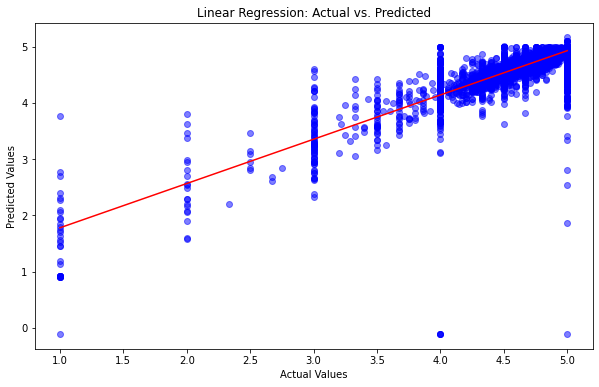

In [153]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, predictions, color = 'blue', alpha = 0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)), color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

#While the earlier values have a wide range, then the clusters get less disselved

The model is working efficiently as the R2 value is at a 0.73 after removing the features with little importance, which means that 73% of the data is contributing to the predictions. The other data might be outliers or the model is not able to pick on the patterns within the data. To rectify this I will go back to the data prep stage and remove or winzsorize outliers and examine the resulting model performance. 

After winsorizing the data values, they made no change to the performance of the model. This is because, as I now realize, that since the data values are on a 1-5 scale, there would be no outliers. I have now commented that section. 

This is the best model I could produce by using Linear Regression. In the future, as a further analysis, it would be beneficial to conduct a more thorough investigation. Perhaps a different, more elegant model like gradient boosted regression or other types of numerical models. 